#Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [3]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd

##Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [336]:
#1. Manual Python nested for loops"

A = np.array([[3,5,9],[3,3,4],[5,9,17]])
B = np.array([[2],[1],[4]])

def mult(a,z):
    C =[]
    for k in a:
    #count = 0
        for i in range(len(k)):
            count = 0
            for j in range(len(k)):
                count += a[i][j]*z[j][0]
        
            C.append(count)   
        return C

mult(A,B)


[47, 25, 87]

In [337]:
#2. Numpy matrix multiplication:
A = np.array([[3,5,9],[3,3,4],[5,9,17]])
B = np.array([[2],[1],[4]])
def dotting(a,b):
    return np.dot(a,b)


[[47]
 [25]
 [87]]


In [360]:
import numpy as np
from numpy import shape
%reload_ext Cython

In [350]:
a = np.matrix('3,5,9;3,3,4;5,9,17')
print a
b = np.matrix('2;1;4')
print b

[[ 3  5  9]
 [ 3  3  4]
 [ 5  9 17]]
[[2]
 [1]
 [4]]


In [364]:
#3 Using cython:

%%cython
#cimport numpy as np
import numpy as np  # makes numpy available to cython
# The following line defines a and b as numpy arrays, cython knows how to deal with those.
def cython_dot(a,b):
    cdef double sum
    cdef long i
    sum=0
    for i in xrange(a.shape[0]):
        sum=sum+a[i]*b[i]
    return sum

cython_dot(a,b)

SyntaxError: invalid syntax (<ipython-input-364-5fd7fd67160b>, line 3)

Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

In [ ]:
def rand_matrix(a,b,c):
    #verify it's ok to create matrices this way
    A = np.random.rand(a,b)
    B = np.random.rand(b,c)
    #now call the three methods from above
    mult(A,B)
    %time mult(A,B)
    print '\n'
    dotting(A,B)
    %time dotting(A,B)
    print '\n'
    cython_dot(A,B)
    %time cython_dot(A,B)
    print '\n'

##I am unable to run cython on this module although it runs fine in the homework module... so I have not run this.
##This is how I would implement the code
%pylab inline
rand_matrix(10,10,10).plot(kind='bar',stacked=False,figsize=(15, 7),title='Plot')
rand_matrix(100,100,100).plot(kind='bar',stacked=False,figsize=(15, 7),title='Plot')
rand_matrix(1000,1000,1000).plot(kind='bar',stacked=False,figsize=(15, 7),title='Plot')
rand_matrix(10000,10000,10000).plot(kind='bar',stacked=False,figsize=(15, 7),title='Plot')
    

In [ ]:
!pip list

**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

# IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below]

1. Tuple
2. Set

Now We can save the above map as a dictionary with Key-value pairs 
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

In [ ]:
datatypes = {'object':'dictionary', 'array':'list','string':'string','integer':'integer','realnumber':'float','true':'True','false':'False','null':'None'}
print datatypes

In [ ]:
#pickling the file
import gzip
import pickle
pickle.dump(datatypes,gzip.open('datatypes','wb'),0)

In [ ]:
#loading the file back
fileread=pickle.load(gzip.open('datatypes','rb'))
fileread
for k,i in fileread.items():
    print '\nThe JSON equivalent for the Python datatype %s is %s'%(i,k)

##Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


###Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [ ]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme

As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

In [ ]:
readme=!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme
readme

Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

In [ ]:
!pwd

In [52]:
#!echo data >> .gitignore
#!git add .gitignore
#!git commit -m 'adding data dir to gitignore'
#!git push
#!curl -o /Users/pauldefusco/Documents/DSE/pdefusco/DSE200/data/cup98lrn.zip http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip
#!unzip /Users/pauldefusco/Documents/DSE/pdefusco/DSE200/data/cup98lrn.zip -d /Users/pauldefusco/Documents/DSE/pdefusco/DSE200/data/
#!git status




Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions:

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

In [343]:
#!wc -l < ../data/cup98LRN.txt
#95413

#it is comma separated
#!more ../data/cup98LRN.txt

#Importing the CSV file:
#dframe = pd.read_csv('../data/cup98LRN.txt', sep = ',')
#dframe
#481 columns

#They don't, there are a lot of empty cells
#The readme 

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
5,9401,CWR,0,AL,35603,,,0,0,,...,0.0,0,L,1,F,X,X,X,16.0,C
6,8701,DRK,0,IN,46755,,,6001,0,,...,0.0,1,L,1,E,X,X,X,53.0,D
7,9401,NWN,0,LA,70611,,,0,0,,...,0.0,1,L,3,E,X,X,X,38.0,C
8,8801,LIS,1,IA,51033,,,0,0,,...,0.0,1,L,1,F,X,X,X,57.0,D
9,9401,MSD,1,TN,37127-,,,3211,0,,...,0.0,0,L,1,F,X,X,X,34.0,B


Give answers to questions 1-4 in this markdown cell:

1. 95413
2. it is comma separated
3. There is a header with 481 columns
4. No there are many empty values

Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets)

In [11]:
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

In [365]:
#Creating Learn Dataframe
learn = pd.read_csv('../data/cup98LRN.txt', sep = ',')

#This shows me what the target columns are: TARGET_B and TARGET_D
#!curl -o /Users/pauldefusco/Documents/DSE/pdefusco/DSE200/data/cup98val.zip http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98val.zip
#!unzip /Users/pauldefusco/Documents/DSE/pdefusco/DSE200/data/cup98val.zip -d /Users/pauldefusco/Documents/DSE/pdefusco/DSE200/data/
#val = pd.read_csv('../data/cup98VAL.txt', sep = ',')
#val

#Building learn_x
#learn_x = learn
#del learn_x['TARGET_B']
#del learn_x['TARGET_D']

#Building learn_y
#learn_y = pd.DataFrame()
#learn_y = learn[['TARGET_B']]
#learn_y[['TARGET_D']] = learn[['TARGET_D']]
#learn_y
col_types

[('ODATEDW', 'Num'),
 ('OSOURCE', 'Char'),
 ('TCODE', 'Num'),
 ('STATE', 'Char'),
 ('ZIP', 'Char'),
 ('MAILCODE', 'Char'),
 ('PVASTATE', 'Char'),
 ('DOB', 'Num'),
 ('NOEXCH', 'Char'),
 ('RECINHSE', 'Char'),
 ('RECP3', 'Char'),
 ('RECPGVG', 'Char'),
 ('RECSWEEP', 'Char'),
 ('MDMAUD', 'Char'),
 ('DOMAIN', 'Char'),
 ('CLUSTER', 'Char'),
 ('AGE', 'Num'),
 ('AGEFLAG', 'Char'),
 ('HOMEOWNR', 'Char'),
 ('CHILD03', 'Char'),
 ('CHILD07', 'Char'),
 ('CHILD12', 'Char'),
 ('CHILD18', 'Char'),
 ('NUMCHLD', 'Num'),
 ('INCOME', 'Num'),
 ('GENDER', 'Char'),
 ('WEALTH1', 'Num'),
 ('HIT', 'Num'),
 ('MBCRAFT', 'Num'),
 ('MBGARDEN', 'Num'),
 ('MBBOOKS', 'Num'),
 ('MBCOLECT', 'Num'),
 ('MAGFAML', 'Num'),
 ('MAGFEM', 'Num'),
 ('MAGMALE', 'Num'),
 ('PUBGARDN', 'Num'),
 ('PUBCULIN', 'Num'),
 ('PUBHLTH', 'Num'),
 ('PUBDOITY', 'Num'),
 ('PUBNEWFN', 'Num'),
 ('PUBPHOTO', 'Num'),
 ('PUBOPP', 'Num'),
 ('DATASRCE', 'Char'),
 ('MALEMILI', 'Num'),
 ('MALEVET', 'Num'),
 ('VIETVETS', 'Num'),
 ('WWIIVETS', 'Num'),
 ('LO

###Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

In [383]:
def print_summary(dframe):
    if isinstance(dframe, pd.DataFrame):
        for i in dframe:
            if dframe[i].dtypes =='int64' or dframe[i].dtypes == 'float64':
                print dframe[i].head()
                print 'mean: '
                print dframe[i].mean()
                print 'std_dev: '
                print dframe[i].std()
                print 'max: '
                print dframe[i].max()
                print 'min: '
                print dframe[i].min()
                print 'missing: '
                print dframe[i].apply(lambda x: x == np.inf or x == -np.inf or str(x).strip() == '') | dframe[i].isnull().sum()
            else:
                print dframe[i].head()
                print 'distinct values: '
                print dframe[i].unique()
                print 'missing: '
                print dframe[i].apply(lambda x: x == np.inf or x == -np.inf or str(x).strip() == '') | dframe[i].isnull().sum()
                print '3 most common: '
                df = dframe.dropna()
                print df[i].value_counts().max()
                print '3 least common: '
                print df[i].value_counts().min() 

print_summary(learn)
                

0    8901
1    9401
2    9001
3    8701
4    8601
Name: ODATEDW, dtype: int64
mean: 
9141.36325619
std_dev: 
343.45475236
max: 
9701
min: 
8306
missing: 
0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
95382    False
95383    False
95384    False
95385    False
95386    False
95387    False
95388    False
95389    False
95390    False
95391    False
95392    False
95393    False
95394    False
95395    False
95396    False
95397    False
95398    False
95399    False
95400    False
95401    False
95402    False
95403    False
95404    False
95405    False
95406    False
95407 

 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [51]:
!curl -o /Users/pauldefusco/Documents/DSE/pdefusco/DSE200/data/CalIt2.data http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0  1968k      0 --:--:-- --:--:-- --:--:-- 2097k


In [68]:
with open('../data/CalIt2.data','r') as f:
    df = pd.DataFrame(l.rstrip().split(',') for l in f)
df.columns = ['Flow_ID','Date','Time','Count']
print(df)

      Flow_ID      Date      Time Count
0           7  07/24/05  00:00:00     0
1           9  07/24/05  00:00:00     0
2           7  07/24/05  00:30:00     1
3           9  07/24/05  00:30:00     0
4           7  07/24/05  01:00:00     0
5           9  07/24/05  01:00:00     0
6           7  07/24/05  01:30:00     0
7           9  07/24/05  01:30:00     0
8           7  07/24/05  02:00:00     0
9           9  07/24/05  02:00:00     0
10          7  07/24/05  02:30:00     2
11          9  07/24/05  02:30:00     0
12          7  07/24/05  03:00:00     0
13          9  07/24/05  03:00:00     0
14          7  07/24/05  03:30:00     0
15          9  07/24/05  03:30:00     0
16          7  07/24/05  04:00:00     0
17          9  07/24/05  04:00:00     0
18          7  07/24/05  04:30:00     0
19          9  07/24/05  04:30:00     0
20          7  07/24/05  05:00:00     0
21          9  07/24/05  05:00:00     0
22          7  07/24/05  05:30:00     0
23          9  07/24/05  05:30:00     0


#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows from the original dataframe whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [385]:
df[['Flow_ID','Count']] = df[['Flow_ID','Count']].apply(pd.to_numeric)
df1 = df[(df.Flow_ID==7) & (df.Date == '07/24/05')]
df1
print '\nThe row count is: '
print len(df1.index) 
df2 = df[df.Count > 5]
df2 = df2.sort(columns='Count', ascending=False) 
df3 = df2.head(10)
df3


The row count is: 
48


/Users/pauldefusco/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Flow_ID,Date,Time,Count
6879,9.0,2005-10-03,15:30:00,62.0
335,9.0,2005-07-27,11:30:00,61.0
6881,9.0,2005-10-03,16:00:00,55.0
9688,7.0,2005-11-01,21:30:00,54.0
9684,7.0,2005-11-01,20:30:00,54.0
9683,9.0,2005-11-01,20:00:00,53.0
6878,7.0,2005-10-03,15:30:00,52.0
9935,9.0,2005-11-04,11:00:00,50.0
8914,9.0,2005-10-24,20:00:00,50.0
3615,9.0,2005-08-30,15:30:00,50.0


#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [419]:
#Part 1.
df4 = df3['Count'].apply(lambda x: x - df3['Count'].min()).mean()

#Part 2. Using the "entire data"
with open('../data/CalIt2.data','r') as f:
    df11 = pd.DataFrame(l.rstrip().split(',') for l in f)
df11.columns = ['Flow_ID','Date','Time','Count']
df11['Date'] = pd.to_datetime(df11['Date']) 
#if df11['Flow_ID']==9 & df11['Date'] == '07/24/05'
df12 = df11['Count'].apply(lambda x: x if df3.Flow_ID == 9 )#.sum()
df12


SyntaxError: invalid syntax (<ipython-input-419-95d8be6ff3c0>, line 10)

#### Indexing an Selecting ####
Exlain the following

1. loc: pandas method used to index through dataframe columns and rows, primarily by label.
2. iloc: pandas method used to index throough dataframe columns and rows, only by integer location.
3. ix: another pandas method used to index thorough dataframe columns and rows. It supports both label and integer based access.
4. at: pandas method used to get fast access to dataframe scalar by position
5. iat: another pandas method used to get fast access to dataframe scalar by position

Highlight the differences by providing usecases where one is more useful than the other

loc vs iloc vs ix:

The valid inputs for loc are:
A single label
A list or array of labels ['a', 'b', 'c']
A slice object with labels
A boolean array
A callable

The valid inputs for iloc are:
An integer e.g. 5
A list or array of integers [4, 3, 0]
A slice object with ints 1:7
A boolean array
A callable

For example, the command s.iloc[:3] will return the first 3 rows of the dataframe because it looks at position. While s.loc[:3] will return the first x rows of the dataframe, up until the row label '3' is reached.

The ix method is also very similar two both because depending on the context, it will either behave as loc or as iloc. If the index is of integer type, ix will use label-based indexing. If the label is not in the index, an error is raised. If the index does not contain only integers, ix will immediately use position-based indexing rather than label-based indexing when an integer is input. When another type is input it will use label-based indexing.

So in conclusion, the three are very similar but you would use loc when you are working with labels and iloc when you are working with integers. ix mixes features from both loc and iloc. However, all three locate values in a dataframe by similar indexing methodologies.

at vs iat:
at: same as loc but used to get scalar values. 
iat: same as iloc but used to get scalar values.


Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

In [144]:
def getdates(date1,date2):
    dt1 = pd.to_datetime(date1, format='%d%m%Y')
    dt2 = pd.to_datetime(date2, format='%d%m%Y')
    start_date = ''
    end_date = ''
    if dt1 > dt2:
        start_date = dt2
        end_date = dt1
    elif dt1 < dt2:
        start_date = dt1
        end_date = dt2
    else:
        return 'Dates are the same - please insert different dates'
    df['Date'] = pd.to_datetime(df['Date'])  
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    return df.loc[mask]
getdates('10102005','01012006')

,Flow_ID,Date,Time,Count
7584,7.0,2005-10-11,00:00:00,2.0
7585,9.0,2005-10-11,00:00:00,2.0
7586,7.0,2005-10-11,00:30:00,1.0
7587,9.0,2005-10-11,00:30:00,0.0
7588,7.0,2005-10-11,01:00:00,0.0
7589,9.0,2005-10-11,01:00:00,0.0
7590,7.0,2005-10-11,01:30:00,0.0
7591,9.0,2005-10-11,01:30:00,0.0
7592,7.0,2005-10-11,02:00:00,1.0
7593,9.0,2005-10-11,02:00:00,0.0


#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [173]:
#Selecting data in the month of August 2005 having flow id=7

with open('../data/CalIt2.data','r') as f:
    newdf = pd.DataFrame(l.rstrip().split(',') for l in f)
newdf.columns = ['Flow_ID','Date','Time','Count']
newdf['Date'] = pd.to_datetime(newdf['Date'])  
newdf[['Flow_ID','Count']] = newdf[['Flow_ID','Count']].apply(pd.to_numeric)
newdf['year'] = newdf['Date'].dt.year
newdf['month'] = newdf['Date'].dt.month
df10 = newdf[(newdf.Flow_ID==7) & (newdf.month==8) & (newdf.year==2005)]
#df10

#2 Grouping the data based on date and getting the max count per date
del df10['year']
del df10['month']
df_by_date = df10.groupby('Date').sum()
df_by_date
#df_by_date['Count'].max()

,Flow_ID,Count
Date,,
2005-08-01,336.0,186.0
2005-08-02,336.0,211.0
2005-08-03,336.0,193.0
2005-08-04,336.0,267.0
2005-08-05,336.0,199.0
2005-08-06,336.0,19.0
2005-08-07,336.0,14.0
2005-08-08,336.0,193.0
2005-08-09,336.0,211.0


#### Stacking, Unstacking ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
3. Unstack the data to get back original data

In [184]:
with open('../data/CalIt2.data','r') as f:
    original = pd.DataFrame(l.rstrip().split(',') for l in f)
original.columns = ['Flow_ID','Date','Time','Count']

del original['Date']
del original['Time']
s = original.stack()
s




0      Flow_ID    7
       Count      0
1      Flow_ID    9
       Count      0
2      Flow_ID    7
       Count      1
3      Flow_ID    9
       Count      0
4      Flow_ID    7
       Count      0
5      Flow_ID    9
       Count      0
6      Flow_ID    7
       Count      0
7      Flow_ID    9
       Count      0
8      Flow_ID    7
       Count      0
9      Flow_ID    9
       Count      0
10     Flow_ID    7
       Count      2
11     Flow_ID    9
       Count      0
12     Flow_ID    7
       Count      0
13     Flow_ID    9
       Count      0
14     Flow_ID    7
       Count      0
                 ..
10067  Flow_ID    9
       Count      0
10068  Flow_ID    7
       Count      2
10069  Flow_ID    9
       Count      0
10070  Flow_ID    7
       Count      0
10071  Flow_ID    9
       Count      0
10072  Flow_ID    7
       Count      0
10073  Flow_ID    9
       Count      0
10074  Flow_ID    7
       Count      3
10075  Flow_ID    9
       Count      0
10076  Flow_ID    7


In [188]:
s.reset_index(level=1)

,level_1,0
0,Flow_ID,7
0,Count,0
1,Flow_ID,9
1,Count,0
2,Flow_ID,7
2,Count,1
3,Flow_ID,9
3,Count,0
4,Flow_ID,7
4,Count,0


#### Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

Populating the interactive namespace from numpy and matplotlib


/Users/pauldefusco/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


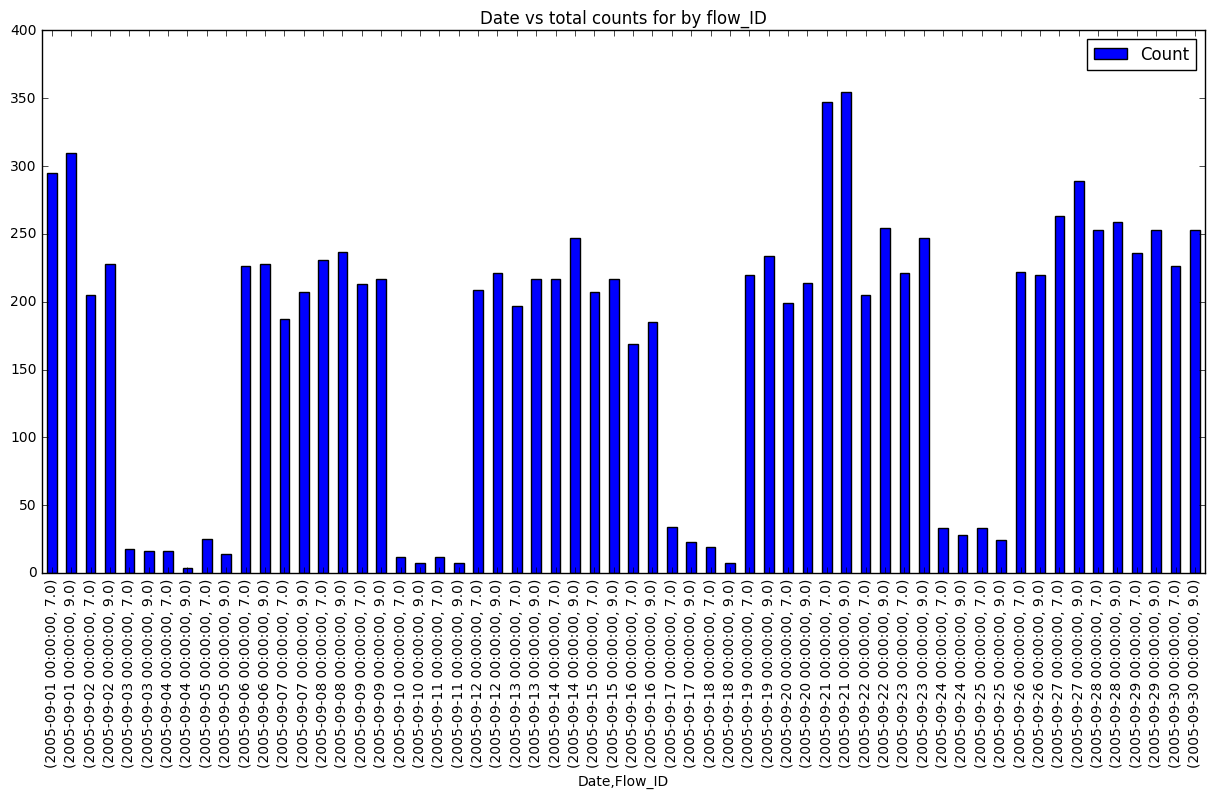

In [203]:
%pylab inline
with open('../data/CalIt2.data','r') as f:
    frame = pd.DataFrame(l.rstrip().split(',') for l in f)
frame.columns = ['Flow_ID','Date','Time','Count']
frame['Date'] = pd.to_datetime(frame['Date'])  
frame[['Flow_ID','Count']] = frame[['Flow_ID','Count']].apply(pd.to_numeric)
frame['year'] = frame['Date'].dt.year
frame['month'] = frame['Date'].dt.month
newframe = frame[(frame.Flow_ID==7) & (frame.month==9) & (frame.year==2005) | (frame.Flow_ID==9) & (frame.month==9) & (frame.year==2005)]
del newframe['month']
del newframe['year']
group_frame = newframe.groupby(['Date','Flow_ID']).sum()
group_frame.plot(kind='bar',stacked=False,figsize=(15, 7),title='Date vs total counts for by flow_ID')